# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [24]:
# use these links to do so:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.metrics import roc_auc_score
import seaborn as sns
dataset = pd.read_csv('Churn.csv')

### Understanding the data

In [25]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
dataset.shape

(7043, 21)

In [27]:
dataset.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [28]:
dataset.isnull().sum().values.sum()

0

In [29]:
dataset.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [30]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [31]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Manipulation

In [32]:
dataset = dataset[dataset['TotalCharges']!=' ']
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'])


In [33]:
for i in range(1,len(dataset.columns)):
    print(dataset.columns[i],"--",dataset[dataset.columns[i]].unique())


gender -- ['Female' 'Male']
SeniorCitizen -- [0 1]
Partner -- ['Yes' 'No']
Dependents -- ['No' 'Yes']
tenure -- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService -- ['No' 'Yes']
MultipleLines -- ['No phone service' 'No' 'Yes']
InternetService -- ['DSL' 'Fiber optic' 'No']
OnlineSecurity -- ['No' 'Yes' 'No internet service']
OnlineBackup -- ['Yes' 'No' 'No internet service']
DeviceProtection -- ['No' 'Yes' 'No internet service']
TechSupport -- ['No' 'Yes' 'No internet service']
StreamingTV -- ['No' 'Yes' 'No internet service']
StreamingMovies -- ['No' 'Yes' 'No internet service']
Contract -- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -- ['Yes' 'No']
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges -- [29.85 56.95 53.85 

In [34]:
labels = [1,3,4,6,7,8,9,10,11,12,13,14,15,16,17,20]

for i in labels:
    dataset.iloc[:,i] = LabelEncoder().fit_transform(dataset.iloc[:,i])

In [35]:
unwantedcolumnlist=["customerID","gender","Partner","StreamingTV","StreamingMovies","PaymentMethod"]
dataset = dataset.drop(unwantedcolumnlist, axis=1)
features = dataset.drop(["Churn"], axis=1).columns


In [36]:
df_train, df_val = train_test_split(dataset, test_size=0.30)
print(df_train.shape)
print(df_val.shape)


(4922, 15)
(2110, 15)


### Data Visualization

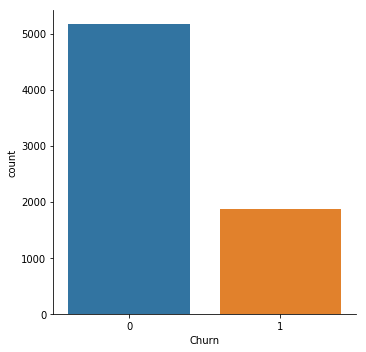

In [37]:
ax = sns.catplot(x="Churn", kind="count", data=dataset)


We need to do binary classification. Target variable is highly unbalanced

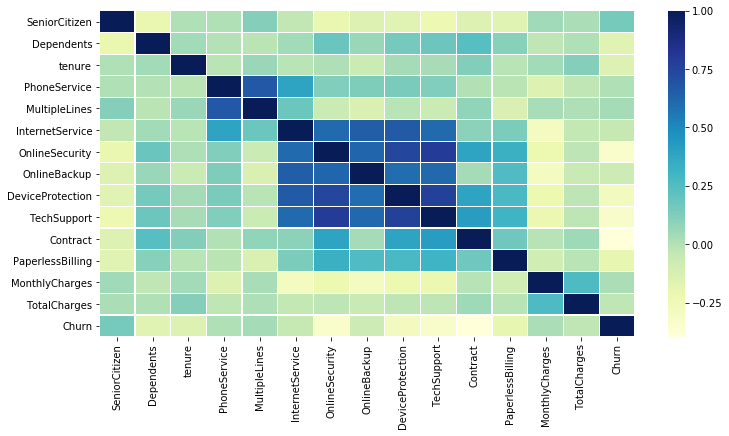

In [38]:
plt.figure(figsize=(12, 6))
corr = dataset.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")


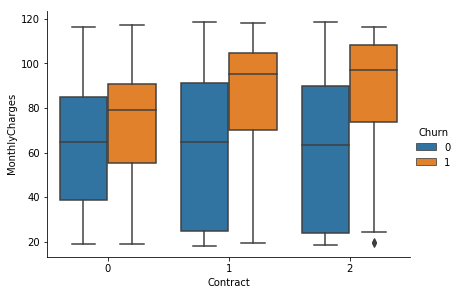

In [39]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=dataset, height=4.2, aspect=1.4)


Longer contracts have higher monthly charges

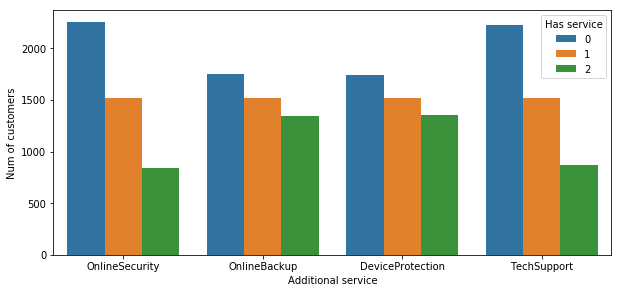

In [40]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]
df1 = pd.melt(dataset[dataset["InternetService"] != 0][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

Number of customers for each additionals service

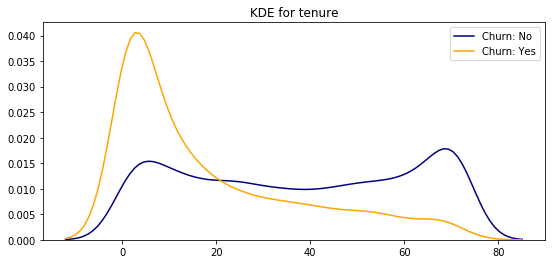

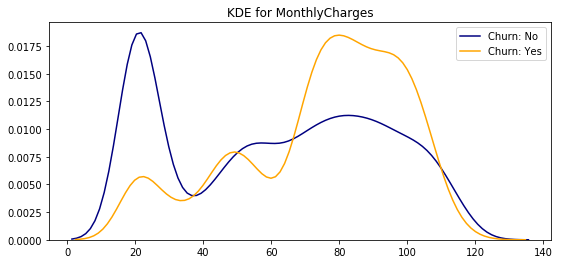

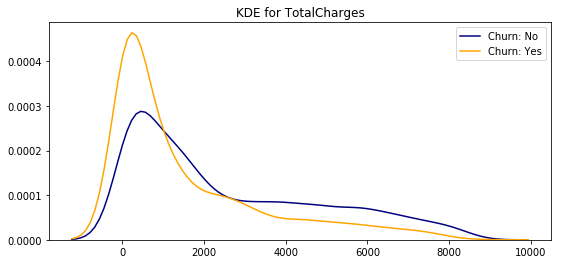

In [41]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(dataset[dataset['Churn'] == 0][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(dataset[dataset['Churn'] == 1][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')


New customers are more likely to churn
Clients with higher MonthlyCharges are more likely to churn

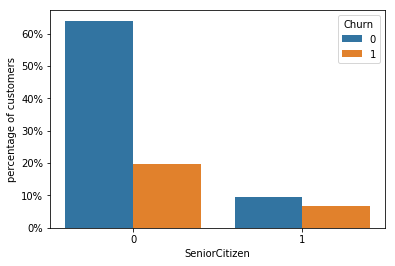

In [42]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    #ratios = pd.DataFrame()
    g = dataset.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(dataset)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

Non senior customers have high churn rate

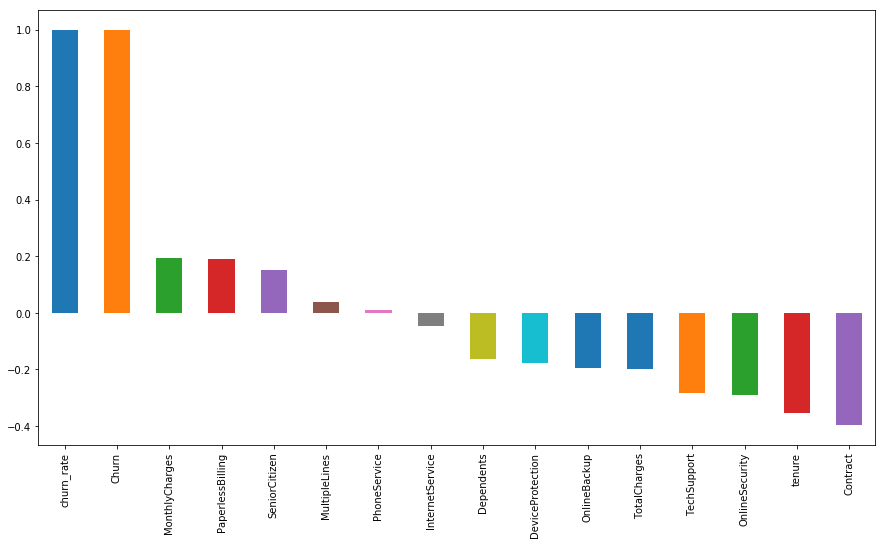

In [46]:
plt.figure(figsize=(15,8))
dataset.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


### Implement Machine Learning Models

Random forest

array([0, 0, 0, ..., 0, 0, 0])

Accuracy:  0.7966824644549763
Area under curve :  0.689854399061208 



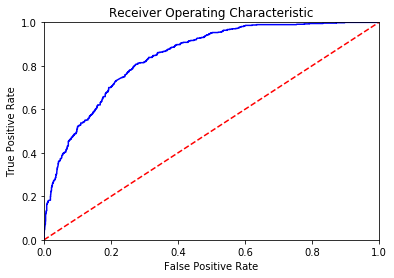

In [16]:
clf = RandomForestClassifier(n_estimators=30 , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto", min_samples_leaf = 50)
clf.fit(df_train[features], df_train["Churn"])
predictions = clf.predict(df_val[features])
probs = clf.predict_proba(df_val[features])
display(predictions)

score = clf.score(df_val[features], df_val["Churn"])
print("Accuracy: ", score)
model_roc_auc = roc_auc_score(df_val["Churn"],predictions) 
print ("Area under curve : ",model_roc_auc,"\n")

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(df_val["Churn"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

KNN

array([0, 0, 0, ..., 0, 0, 0])

Accuracy:  0.7592417061611374
Area under curve :  0.6657091078875937 



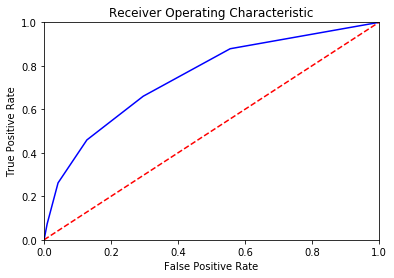

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', metric='minkowski',
           metric_params=None, n_neighbors=5, p=2,
           weights='uniform')
knn.fit(df_train[features], df_train["Churn"])
knn_pred = knn.predict(df_val[features])
knn_probs = knn.predict_proba(df_val[features])
display(knn_pred)
score = knn.score(df_val[features], df_val["Churn"])
print("Accuracy: ", score)
model_roc_auc = roc_auc_score(df_val["Churn"],knn_pred) 
print ("Area under curve : ",model_roc_auc,"\n")

fpr, tpr, threshold = roc_curve(df_val["Churn"], knn_probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Logistic Regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, ..., 0, 0, 0])

Accuracy:  0.7928909952606635
Area under curve :  0.7142647994835739 



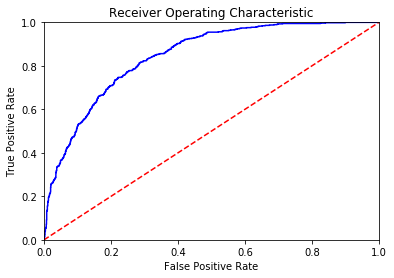

In [18]:
from sklearn.linear_model import LogisticRegression
logit  = LogisticRegression(random_state=0)
logit.fit(df_train[features], df_train["Churn"])
logit_pred = logit.predict(df_val[features])
logit_probs = logit.predict_proba(df_val[features])
display(logit_pred)
score = logit.score(df_val[features], df_val["Churn"])
print("Accuracy: ", score)
model_roc_auc = roc_auc_score(df_val["Churn"],logit_pred) 
print ("Area under curve : ",model_roc_auc,"\n")

fpr, tpr, threshold = roc_curve(df_val["Churn"], logit_probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Model Evaluation

In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                      
                      })
    return df


In [20]:
model1 = model_report(logit,df_train[features],df_val[features],df_train["Churn"],df_val["Churn"],
                      "Logistic Regression(Baseline_model)")
model2 = model_report(knn,df_train[features],df_val[features],df_train["Churn"],df_val["Churn"],
                      "KNN Classifier")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model3 = model_report(rfc,df_train[features],df_val[features],df_train["Churn"],df_val["Churn"],
                      "Random Forest Classifier")

#concat all models
model_performances = pd.concat([model1,model2,model3],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1)
print(model_performances)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


                                 Model  Accuracy_score  Recall_score  \
0  Logistic Regression(Baseline_model)        0.792891      0.540728   
1                       KNN Classifier        0.759242      0.459272   
2             Random Forest Classifier        0.792891      0.511265   

   Precision  f1_score  Area_under_curve  
0   0.644628  0.588124          0.714265  
1   0.574837  0.510597          0.665709  
2   0.655556  0.574489          0.705078  


### Final Conclusions

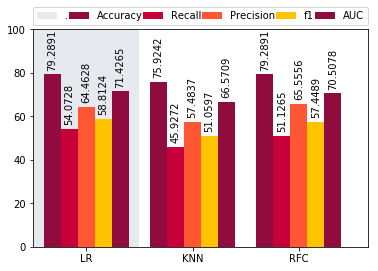

In [44]:
raw_data = {'plan_type': ['LR', 'KNN', 'RFC'],
        '.': [100, 0, 0],
        'Accuracy': [model_performances['Accuracy_score'][0]*100, model_performances['Accuracy_score'][1]*100, model_performances['Accuracy_score'][2]*100],
        'Recall': [model_performances['Recall_score'][0]*100, model_performances['Recall_score'][1]*100, model_performances['Recall_score'][2]*100],
        'Precision': [model_performances['Precision'][0]*100, model_performances['Precision'][1]*100, model_performances['Precision'][2]*100],
        'f1': [model_performances['f1_score'][0]*100, model_performances['f1_score'][1]*100, model_performances['f1_score'][2]*100],
        'AUC': [model_performances['Area_under_curve'][0]*100, model_performances['Area_under_curve'][1]*100, model_performances['Area_under_curve'][2]*100]

    }
df2 =pd.DataFrame(raw_data, columns = ['plan_type', '.'])
df = pd.DataFrame(raw_data, 
                  columns = ['plan_type', 'Accuracy', 'Recall', 'Precision','f1','AUC'])

ax = df2.plot.bar(rot=0,color='#E6E9ED',width=1)
ax = df.plot.bar(rot=0, ax=ax, color=["#900C3F", '#C70039', '#FF5733', '#FFC300'], 
                 width = 0.8 )

for p in ax.patches[1:]:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h != 0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), rotation=90, 
                   textcoords="offset points", ha="center", va="bottom")

ax.set_xlim(-0.5, None)
ax.margins(y=0)
ax.legend(ncol=len(df.columns), loc="lower left", bbox_to_anchor=(0,1.02,1,0.08), 
          borderaxespad=0, mode="expand")
ax.set_xticklabels(df["plan_type"])
plt.show()